In [1]:
from mcnpy.endf.read_endf import read_endf
from mcnpy.utils import configure_endf_debug_logging
from mcnpy.cov.mf34cov_heatmap import plot_mf34_uncertainties, plot_mf34_covariance_heatmap
import logging

# === DEBUG LOGGING SETUP ===
modules = [
    'mcnpy.endf.parsers.parse_mf34',
    ]
configure_endf_debug_logging(enable=True, level=logging.DEBUG, modules=modules)

<RootLogger root (WARNING)>

In [2]:
#jendl_Fe56 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
#jendl_endf = read_endf(jendl_Fe56)

In [3]:
jeff_Fe56 = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'
jeff_endf = read_endf(jeff_Fe56)

cov = jeff_endf.mf[34].to_ang_covmat()

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MF34 with 339 lines
[DEBUG] mcnpy.endf.parsers.parse_mf34: Found MT sections: [2]
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MT2 with 339 lines
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing subsection 1/1 with MAT1=0, MT1=2, NL=6, NL1=6
[DEBUG] mcnpy.endf.parsers.parse_mf34: Processing 21 sub-subsections for this subsection
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing sub-subsection 1/21 with L=1, L1=1, LCT=0, NI=3
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing LIST record 1/3 with LS=1, LB=5, NT=66, NE=11
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 processing: LS=1, NE=11
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 symmetric matrix: 10x10, upper triangle = 55 elements
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 total values to read: 11 (energies) + 55 (matrix) = 66
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 read 66 total values
[DEBUG

In [4]:
cov.summary()

,isotope_row,reaction_row,L_row,isotope_col,reaction_col,L_col,NE,M,is_relative,frame
0,26056,2,1,26056,2,1,43,42,True,same-as-MF4
1,26056,2,1,26056,2,2,16,15,True,same-as-MF4
2,26056,2,1,26056,2,3,16,15,True,same-as-MF4
3,26056,2,1,26056,2,4,16,15,True,same-as-MF4
4,26056,2,1,26056,2,5,13,12,True,same-as-MF4
5,26056,2,1,26056,2,6,13,12,True,same-as-MF4
6,26056,2,2,26056,2,2,43,42,True,same-as-MF4
7,26056,2,2,26056,2,3,16,15,True,same-as-MF4
8,26056,2,2,26056,2,4,16,15,True,same-as-MF4
9,26056,2,2,26056,2,5,13,12,True,same-as-MF4


In [5]:
print(cov.describe(1))

Matrix 1:
  Reaction: 26056 MT2 (L=1) ↔ 26056 MT2 (L=2)
  Shape: (15, 15), Energy grid: 16 points (15 intervals)
  Type: Relative
  Reference frame: same-as-MF4


In [6]:
cov.to_dataframe()   

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.09072, 0.01232, 0.01232, 0.01232, 0.01232,..."
1,26056,2,1,26056,2,2,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,26056,2,1,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,26056,2,1,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,26056,2,1,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,26056,2,1,26056,2,6,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,26056,2,2,26056,2,2,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.07785, 0.006561, 0.006561, 0.006561, 0.006..."
7,26056,2,2,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,26056,2,2,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,26056,2,2,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [7]:
#cov = jendl_endf.mf[34].to_ang_covmat()

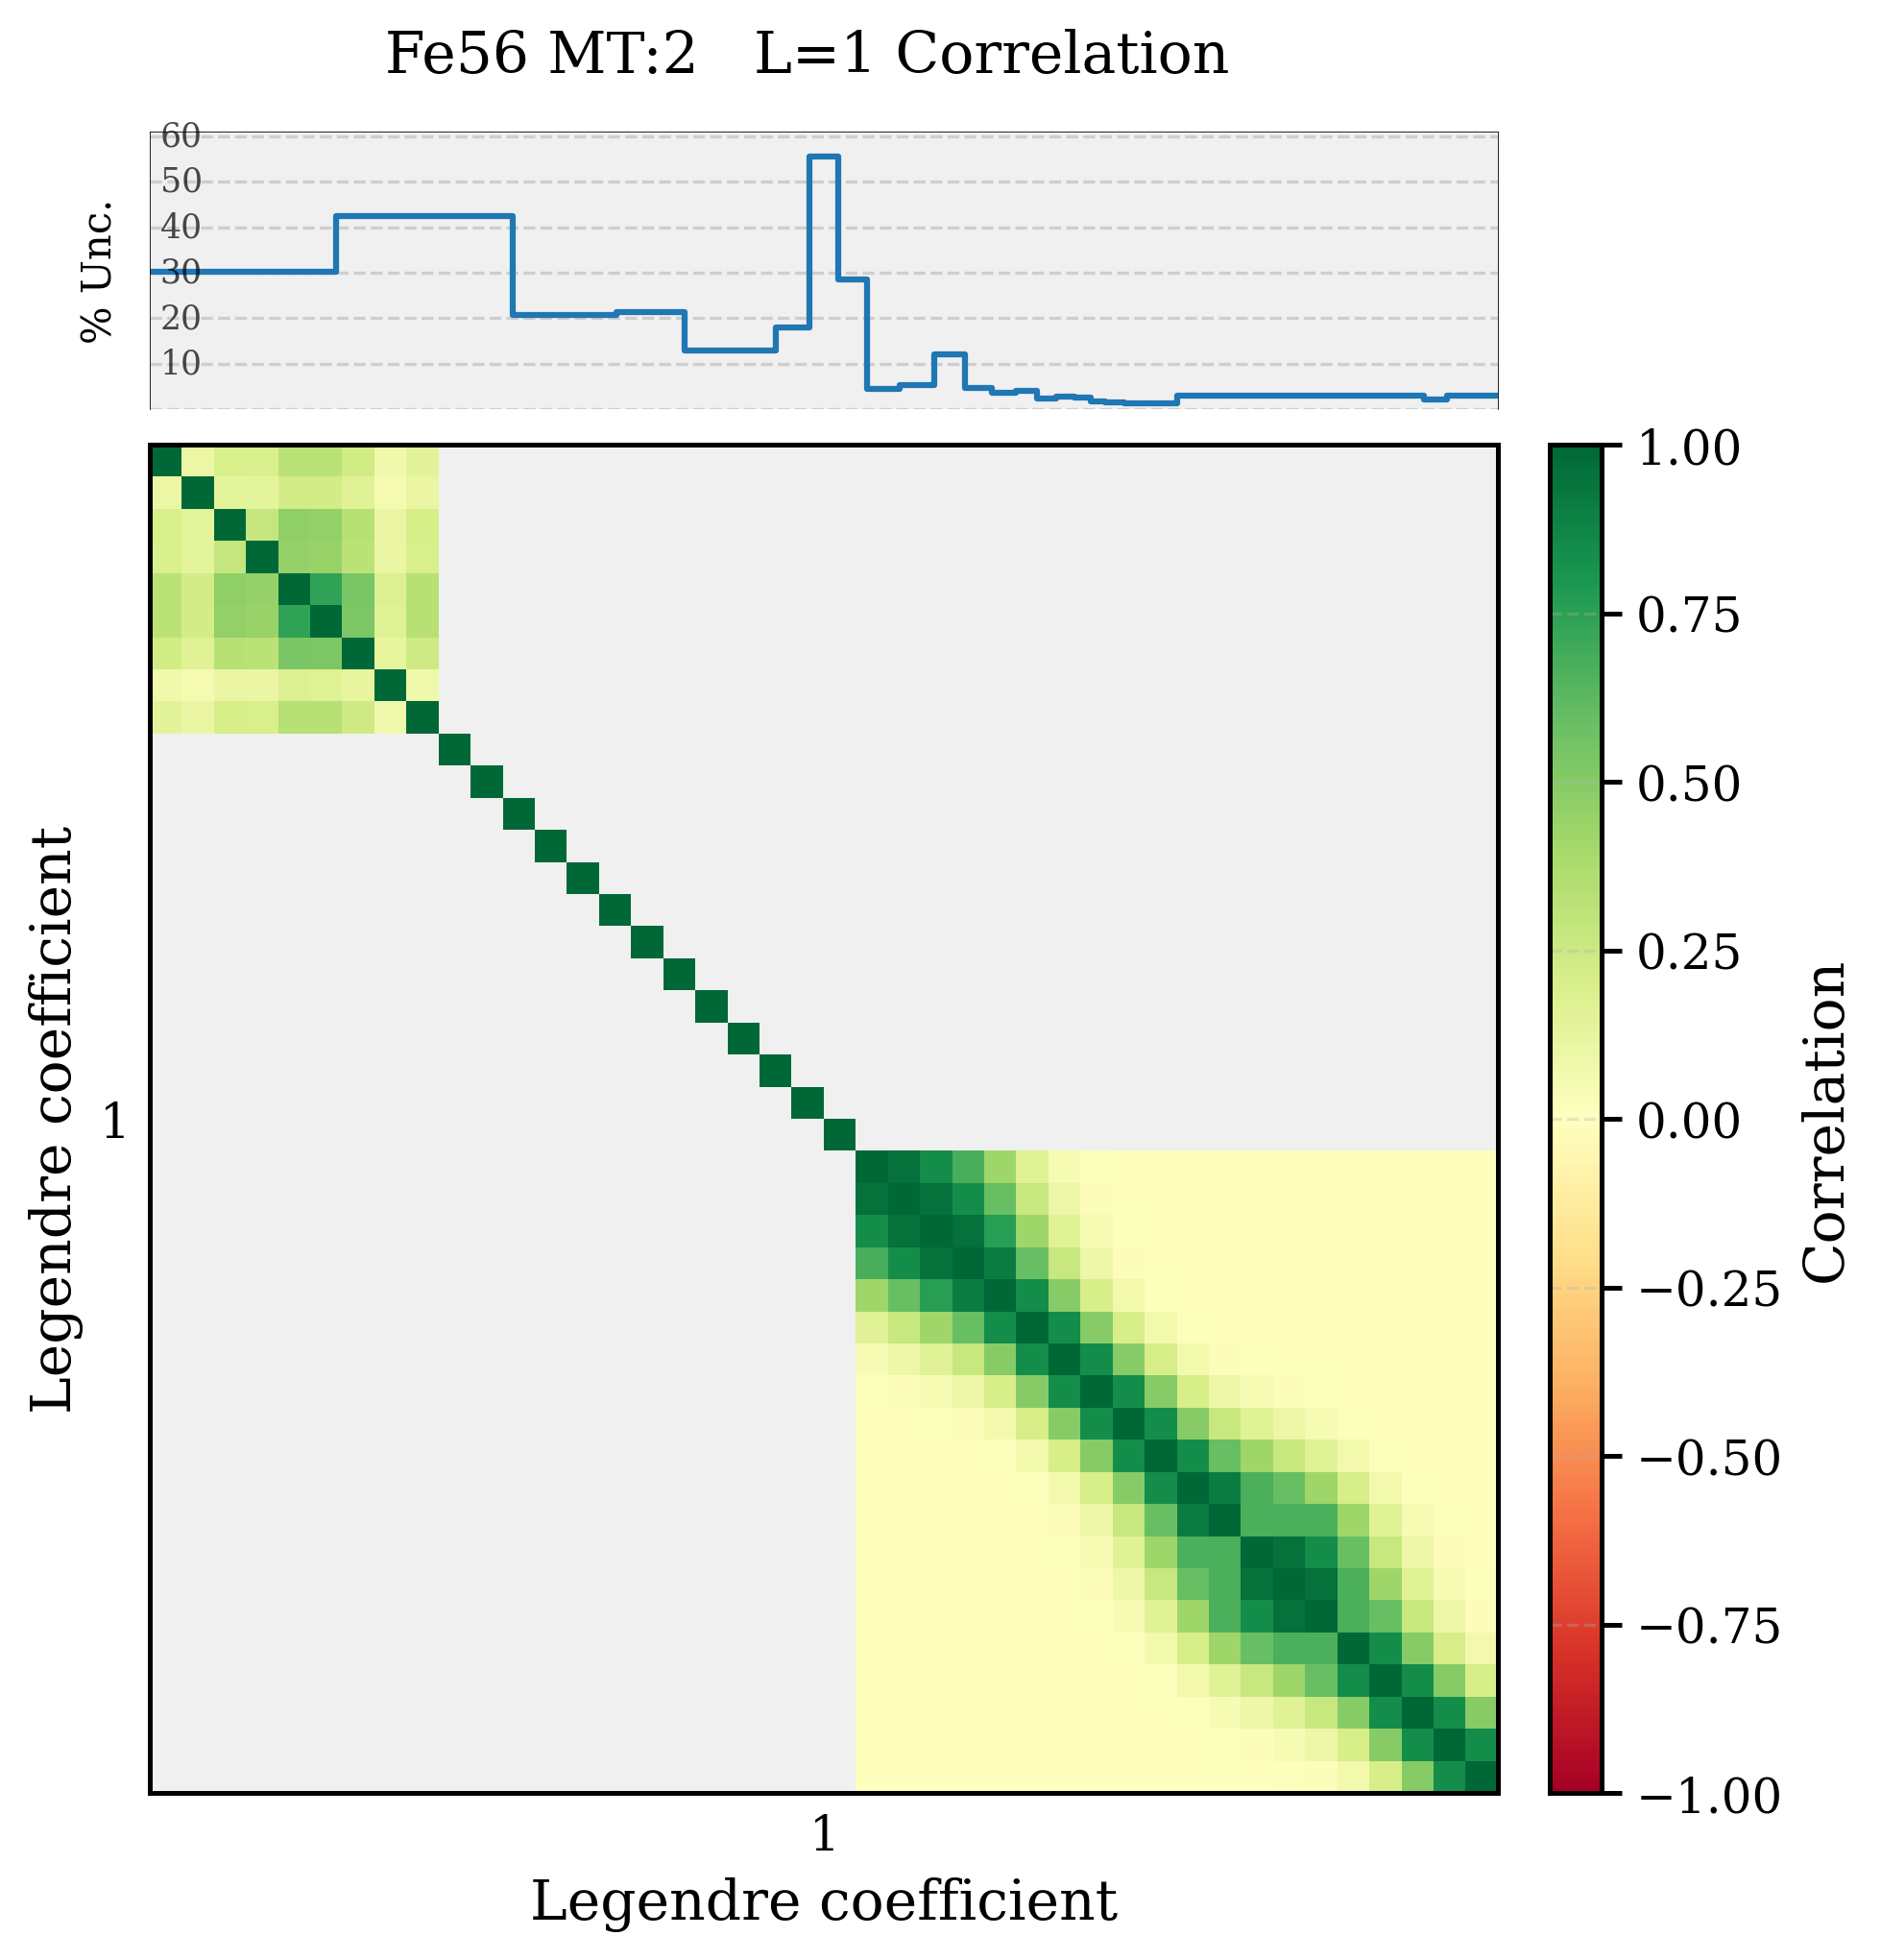

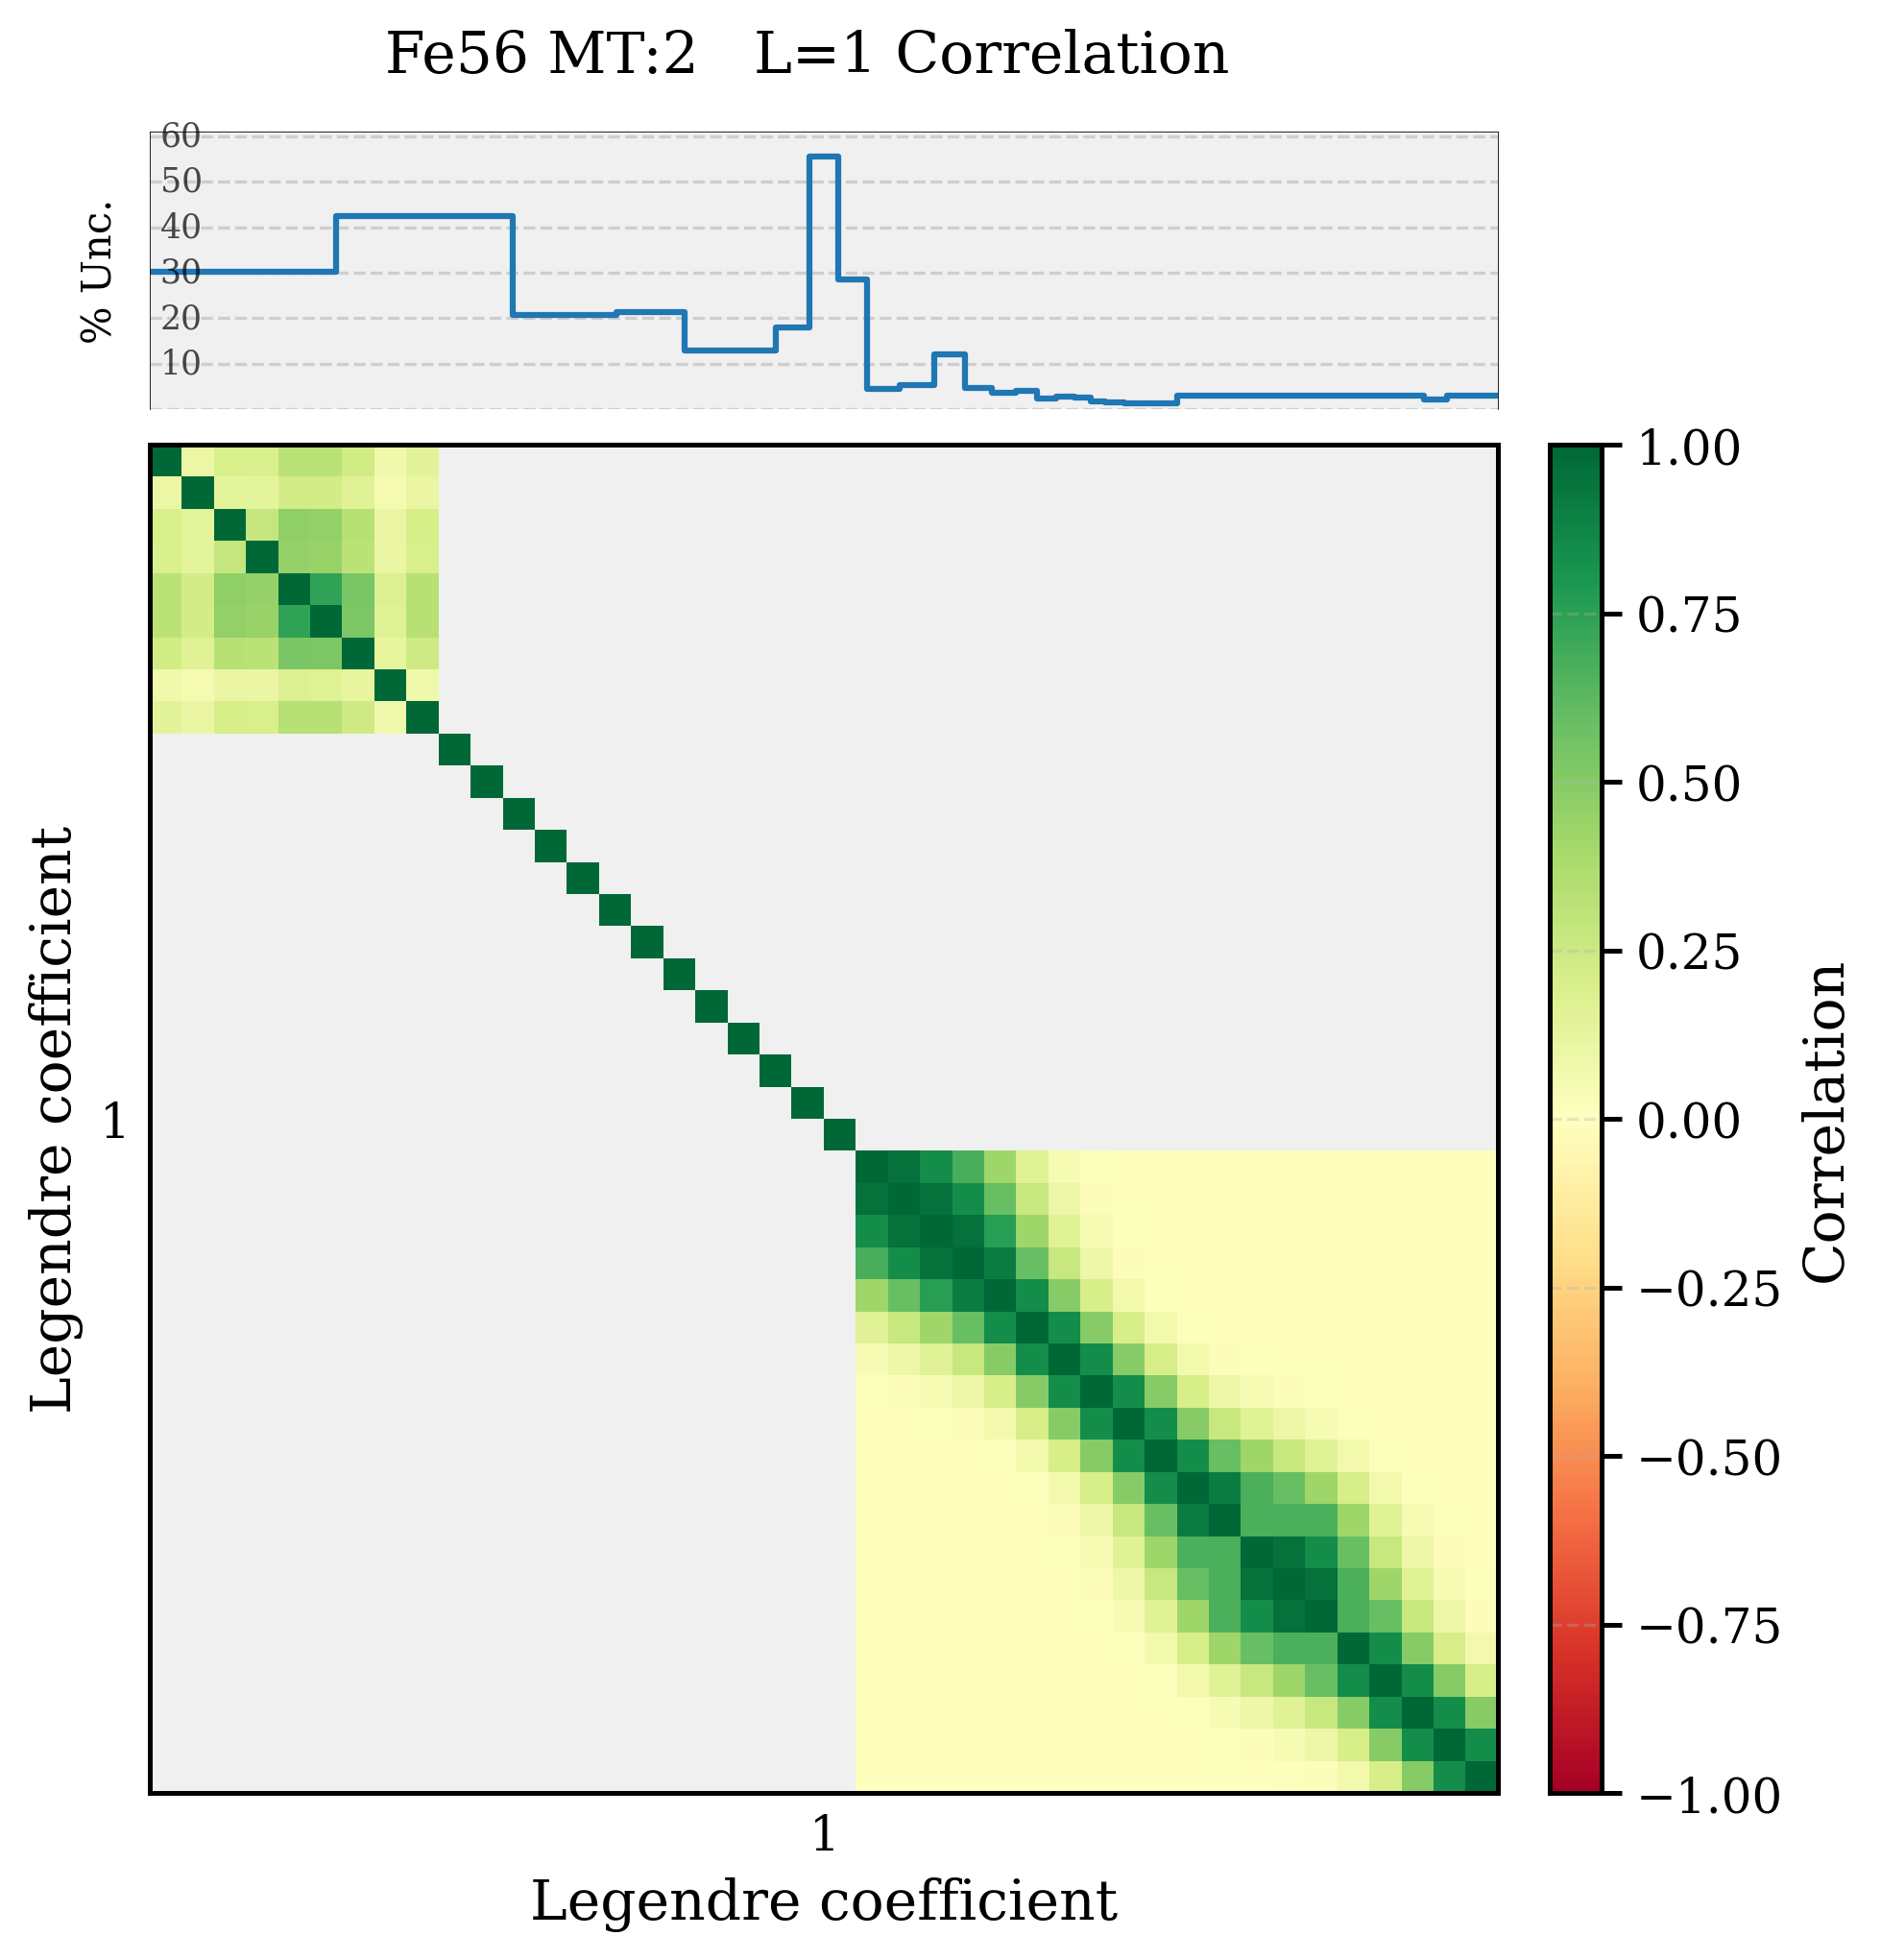

In [8]:
cov.plot_covariance_heatmap(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    matrix_type="corr",
    show_uncertainties=True
)


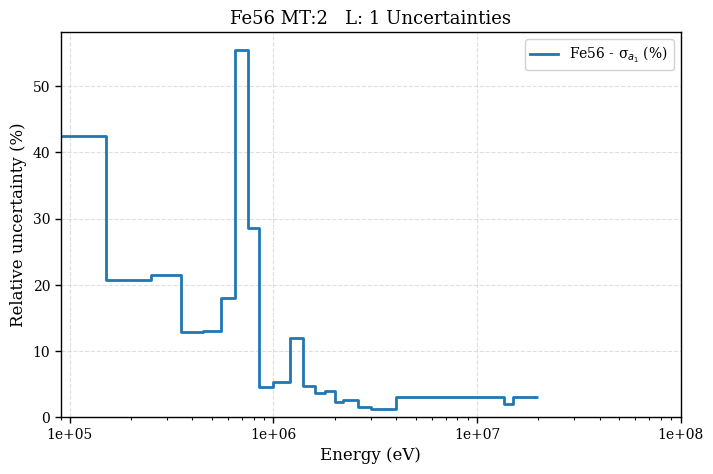

In [9]:
cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    energy_range=(9e4, 1e8),
);
